In [ ]:
!pip install pandas_datareader --upgrade
!pip install plotly

     |████████████████████████████████| 109 kB 26.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

In [ ]:
#Import Data
def get_data(stocks, start, end):
  stockData = pdr.get_data_yahoo(stocks,start,end)
  stockData = stockData['Close'] 
  returns = stockData.pct_change()
  meanReturns = returns.mean()
  covMatrix = returns.cov()
  return meanReturns, covMatrix

In [ ]:
stockList = ['CBA', 'BHP', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)
print(meanReturns)

Symbols
CBA.AX    0.000356
BHP.AX   -0.000257
NAB.AX    0.000939
WBC.AX   -0.000124
STO.AX    0.001274
dtype: float64


In [ ]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

print (weights)

[0.14062299 0.17361525 0.30250918 0.17803365 0.20521893]


(5, 100)
(100, 100)
(5, 5)
(100, 5)


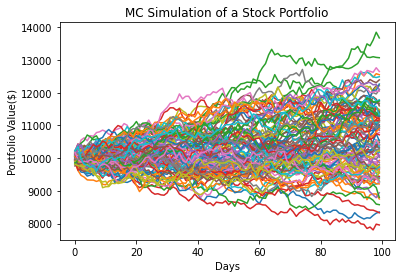

In [ ]:
#Monte Carlo Simulation

mc_sims = 100   #Number of simulations
T = 100         #Timeframe in Days

meanM = np.full(shape = (T, len(weights)), fill_value = meanReturns)   #Mean constant value for 100 time periods for N Companies(100,N)
meanM = meanM.T
print(np.shape(meanM))

initialCapital = 10000

portfolio_sims = np.full(shape = (T, mc_sims), fill_value = 0.0)      #Empty Matrix for 100 time periods for 100 simulations.
print(np.shape(portfolio_sims))

for m in range(0,mc_sims):
  #MC Loops
  Z = np.random.normal(size = (T, len(weights)))                      #Multivariate uncorrelated RETURN distribution for N companies and 100 time steps
  L = np.linalg.cholesky(covMatrix)                                   #Covariance Filter after Cholesky Decomposition to simulate Portfolio Inter-Asset Correlation
  if (m == 10): print(np.shape(L))
  if (m == 10): print(np.shape(Z))
  dailyReturns = meanM + np.inner(L,Z)                                #Calculating Return by adding Variance Term to Constant Mean
  portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T) + 1) * initialCapital    
  #Cumulating Returns compounded(Cumulative Product) daily to obtain price moves.

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value($)')
plt.xlabel('Days')
plt.title('MC Simulation of a Stock Portfolio')
plt.show()


